# Import Titanic Train and Test CSV files

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
# import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("E:\\NCI\\Database & Analytics Programming\\Week 4\\train.csv",index_col=False)
train_data
df1 = pd.DataFrame(train_data)
df1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Show first five rows and 3 columns of dataframs

In [2]:
df1.iloc[:5,:3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


# Scatter Plot for 2D data, For Age and and Fare in Training Data, Try to conclude both relationships 

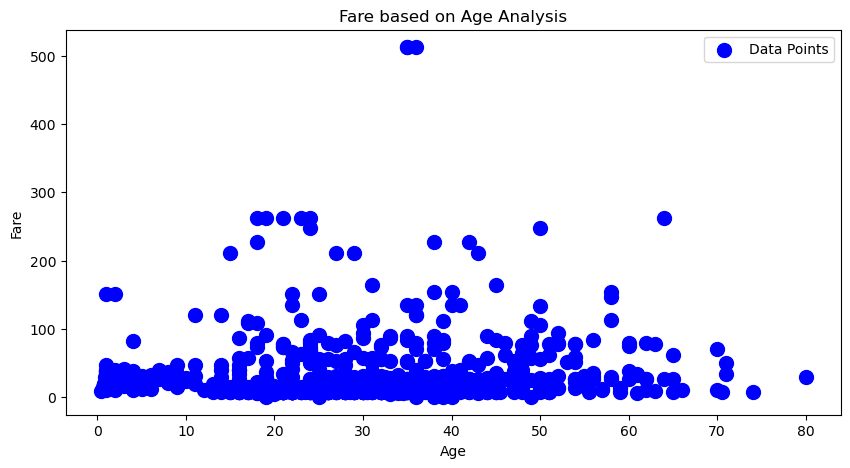

In [3]:
age=list(df1.Age)
#age
fare=list(df1.Fare)
#fare
#age and fare data together
age_fare_data = [(a, f) for a, f in zip(age, fare) if a is not None and f is not None]
age, fare = zip(*age_fare_data)

# Create a scatter plot of age vs. drug effectiveness
plt.figure(figsize=(10, 5))
plt.scatter(age, fare, marker='o', s=100, c='blue', label='Data Points')

# Labels and titles
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare based on Age Analysis')

plt.legend()
plt.show()


# Relationship 

# Check for missing values in both Train and Test

In [4]:
test_data = pd.read_csv("E:\\NCI\\Database & Analytics Programming\\Week 4\\test.csv",index_col=False)
#test_data
df2=pd.DataFrame(test_data)
#df2
#checking for missing values in train and test data
missing_train = df1.isna()  # or df.isnull()
print("Missing values in Train\n\n",missing_train)
missing_test = df2.isna()
print("Missing values in Test\n\n",missing_test)


Missing values in Train

      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

 

# How Much memory is used by Train and Test DataFram

In [5]:
print("Memory usage by Train\n")
df1.info()
print("\n\nMemory usage by Test\n")
df2.info()

Memory usage by Train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Memory usage by Test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

# Number of null values in each features in both files

In [6]:
missing_values_count = df1.isna().sum()
print("Null values count for train:\n",missing_values_count)
missing_values_count2 = df2.isna().sum()
print("\nNull values count for test:\n",missing_values_count2)

Null values count for train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values count for test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Find the total number of missing values from the both datafram

In [7]:
total_missing_values_count = df1.isna().sum().sum()
print("Total Null values count for train:\n",total_missing_values_count)
total_missing_values_count2 = df2.isna().sum().sum()
print("\nTotal Null values count for test:\n",total_missing_values_count2)

Total Null values count for train:
 866

Total Null values count for test:
 414


# Visualise the mising value heatmap

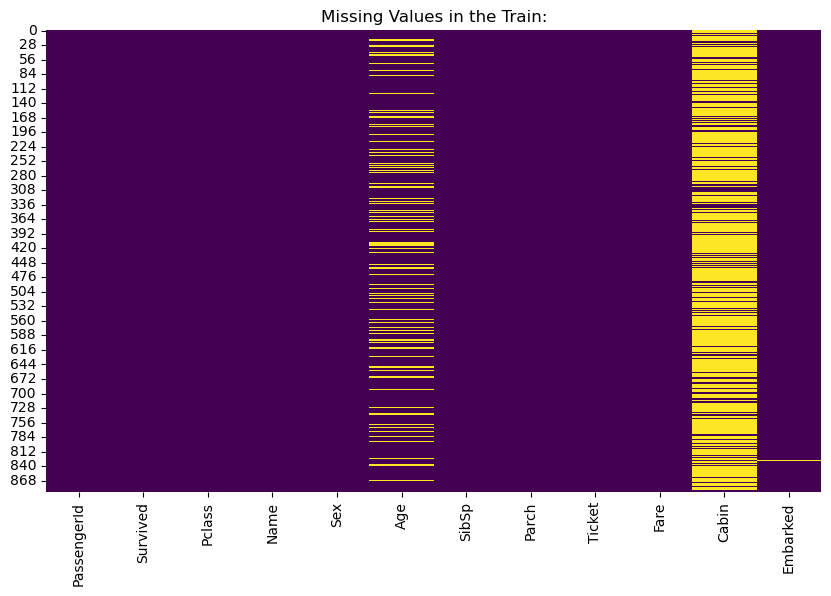

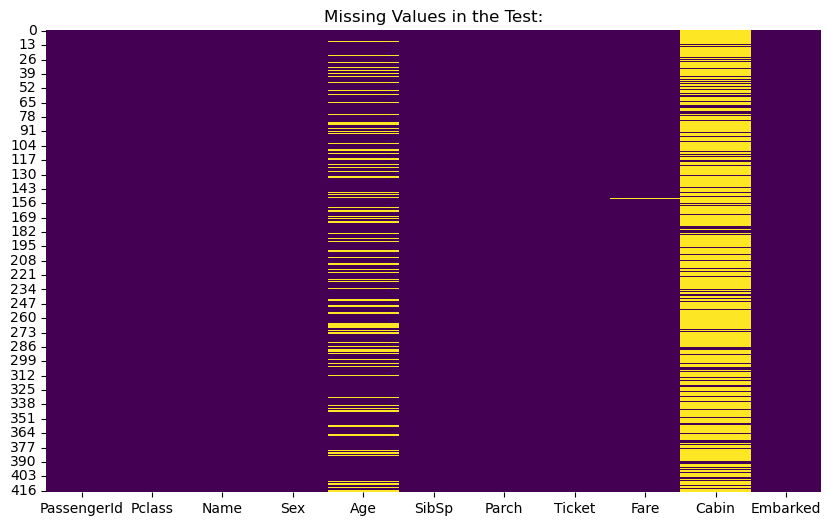

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df1.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Train:')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df2.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Test:')
plt.show()

# Check Data Distribution of Fare, Age and mention their distributions

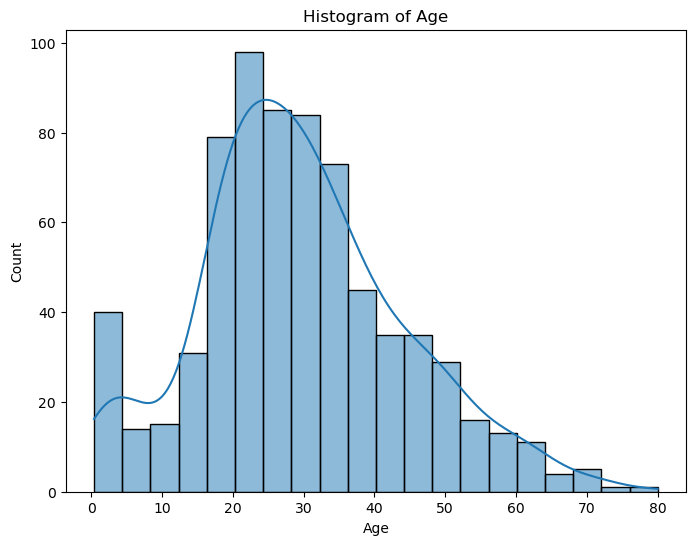

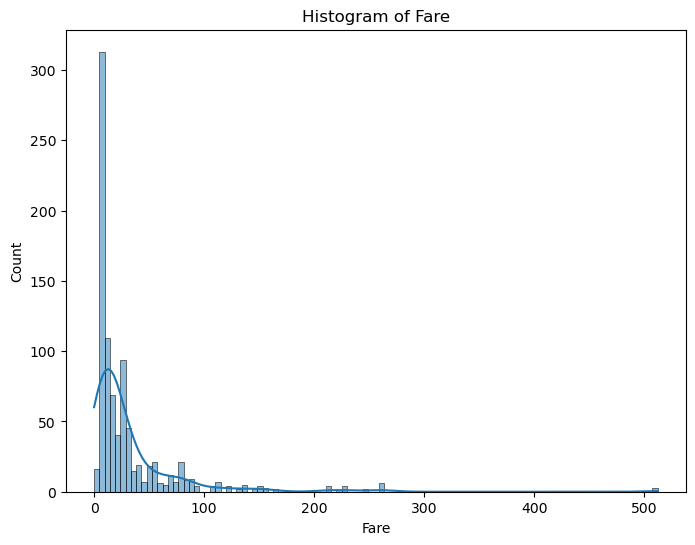

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df1['Age'], kde=True)  # KDE (Kernel Density Estimation) adds a smoothed curve
plt.title('Histogram of Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df1['Fare'], kde=True)  # KDE (Kernel Density Estimation) adds a smoothed curve
plt.title('Histogram of Fare')
plt.show()


Train Data : Skewed Distribution
Test Data : Skewed Distribution

# Deletion of Missing Data
# Remove rows with any missing values from both datafram and save in different datafram and keep orignal one for further processing 

In [17]:
df_train_wnv = df1.dropna()
df_test_wnv= df2.dropna()
#df_train_wnv
#df_test_wnv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


# Mean/Median Imputation
# Fill missing values with the mean of the column, If you are getting error let me know and try to explain why this error happening and if there is no error explain it why their is no error

In [22]:
df_mean_impute_train = df1.fillna(df1.mean())
print("\nMethod 2 - Mean/Median Imputation:")
print(df_mean_impute_train)




Method 2 - Mean/Median Imputation:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                           

C:\Users\User\AppData\Local\Temp\ipykernel_14528\4274795224.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_impute_train = df1.fillna(df1.mean())


REASON we are getting error is because:
We are calculating mean for non numeric values as well, where mean cannot be calculated.

Labelencoder product is used to convert string to numerical data and mode is the right option as Labeling mean will also be not proper

# Do same thing using IterativeImputer

In [30]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Method 4: Regression Imputation using IterativeImputer
# Predict missing values using other columns
imputer = IterativeImputer(random_state=0)

# The IterativeImputer handles missing values using regression imputation
df1_numeric=df1._get_numeric_data()
#df1_numeric
df_imputed_train = pd.DataFrame(imputer.fit_transform(df1_numeric), columns=df1_numeric.columns)

print("\nMethod 4 - Regression Imputation (IterativeImputer) for train:")
print(df_imputed_train)


# The IterativeImputer handles missing values using regression imputation
df2_numeric=df1._get_numeric_data()
#df1_numeric
df_imputed_test = pd.DataFrame(imputer.fit_transform(df2_numeric), columns=df2_numeric.columns)

print("\nMethod 4 - Regression Imputation (IterativeImputer) for test:")
print(df_imputed_test)





Method 4 - Regression Imputation (IterativeImputer) for train:
     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0            1.0       0.0     3.0  22.000000    1.0    0.0   7.2500
1            2.0       1.0     1.0  38.000000    1.0    0.0  71.2833
2            3.0       1.0     3.0  26.000000    0.0    0.0   7.9250
3            4.0       1.0     1.0  35.000000    1.0    0.0  53.1000
4            5.0       0.0     3.0  35.000000    0.0    0.0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886        887.0       0.0     2.0  27.000000    0.0    0.0  13.0000
887        888.0       1.0     1.0  19.000000    0.0    0.0  30.0000
888        889.0       0.0     3.0  23.414502    1.0    2.0  23.4500
889        890.0       1.0     1.0  26.000000    0.0    0.0  30.0000
890        891.0       0.0     3.0  32.000000    0.0    0.0   7.7500

[891 rows x 7 columns]

Method 4 - Regression Imputation (IterativeImputer) for test:
     PassengerId  Sur

# Merge both dataset (How you will combine them perfectly?)

In [51]:
#merging imputed dataframes

df_col_merged = pd.concat([df_imputed_train, df_imputed_test] )
df_col_merged
desired_column_order = ['PassengerId', 'Survived','Pclass','Age','SibSp','Parch','Fare']
result = df_col_merged[desired_column_order]
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,23.414502,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000


In [45]:
#to check if the datafarmes are combined with same column name
result[:892]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,23.414502,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000
890,891.0,0.0,3.0,32.000000,0.0,0.0,7.7500


In [50]:
#combining two dataframes with diffrent column count (original data frames)
train_data_ws=df1.drop('Survived',axis=1)
df_combined1=pd.concat([train_data_ws,df2])
df_combined1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
